<a href="https://colab.research.google.com/github/Eduardo-Rivera98/Final-Project-Fundus-Analysis/blob/main/Model_Myopia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from numpy import load

In [ ]:
c=load('drive/MyDrive/x.npy')

In [ ]:
y=load('y.npy')

In [ ]:
for i in range(len(y)):
  if y[i]==5:
    y[i]=1

In [ ]:
x=c

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense, Conv2D
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(250,250,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
model.fit(x_train, y_train, epochs=5,verbose=1,shuffle = True, validation_data=(x_test,y_test))

Epoch 1/5
124/124 [==============================] - 626s 5s/step - loss: 0.8489 - accuracy: 0.6097 - val_loss: 0.6279 - val_accuracy: 0.6245
Epoch 2/5
124/124 [==============================] - 632s 5s/step - loss: 0.5820 - accuracy: 0.6897 - val_loss: 0.5727 - val_accuracy: 0.7126
Epoch 3/5
124/124 [==============================] - 628s 5s/step - loss: 0.5677 - accuracy: 0.7358 - val_loss: 0.4951 - val_accuracy: 0.7834
Epoch 4/5
124/124 [==============================] - 627s 5s/step - loss: 0.4478 - accuracy: 0.7854 - val_loss: 0.4434 - val_accuracy: 0.7925
Epoch 5/5
124/124 [==============================] - 627s 5s/step - loss: 0.3867 - accuracy: 0.8236 - val_loss: 0.4161 - val_accuracy: 0.8138


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
y_pred=(model.predict(x_test) > 0.5).astype("int32")

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.77      0.78       413
           1       0.84      0.85      0.84       575

    accuracy                           0.81       988
   macro avg       0.81      0.81      0.81       988
weighted avg       0.81      0.81      0.81       988



(<Figure size 576x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f790db18910>)

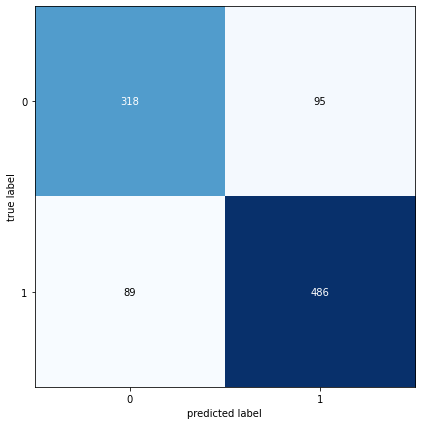

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat = cm,figsize=(8,7))

In [ ]:
model.save('drive/MyDrive/my_model_myopia.h5')

In [ ]:
drive.flush_and_unmount()